In [37]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import analysis
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [2]:
x_test, y_test = analysis.LoadData('data/test/',['normal', 'pneumonia'], img_size = 512)

data/test/normal
data/test/pneumonia


In [42]:
model1 = load_model('CNN1.keras')
model2 = load_model('CNN2.keras')

In [43]:
history1 = analysis.OpenHistory('/home/george/ds-projects/xray-pneumonia/history1.json')
history2 = analysis.OpenHistory('/home/george/ds-projects/xray-pneumonia/history2.json')

In [44]:
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


## Model evaluation

#### Accuracy

In [45]:
accuracy1 = analysis.Accuracy(predictions1, y_test, thresh = 0.4)
accuracy2 = analysis.Accuracy(predictions2, y_test, thresh = 0.4)

In [46]:
print(f'Accuracy CNN 1 = {accuracy1:.4f}')
print(f'Accuracy CNN 2 = {accuracy2:.4f}')

Accuracy CNN 1 = 0.9264
Accuracy CNN 2 = 0.9384


#### Key Performance Metrics

Threshold = 0.5

In [49]:
precision_cnn1, recall_cnn1, f1_cnn1, fpr_cnn1 = analysis.MetricsCalc(analysis.yPred(predictions1, thresh = 0.5), y_test)
precision_cnn2, recall_cnn2, f1_cnn2, fpr_cnn2 = analysis.MetricsCalc(analysis.yPred(predictions2, thresh = 0.5), y_test)
print(f'CNN1: Precision = {precision_cnn1:.4f}, Recall = {recall_cnn1:.4f}, F1 Score = {f1_cnn1:.4f}')
print(f'CNN2: Precision = {precision_cnn2:.4f}, Recall = {recall_cnn2:.4f}, F1 Score = {f1_cnn2:.4f}')

CNN1: Precision = 0.9692, Recall = 0.9216, F1 Score = 0.9448
CNN2: Precision = 0.9813, Recall = 0.9193, F1 Score = 0.9493


Check effect of threshold on metrics:

In [51]:
threshold_arr = np.linspace(0.01,1,10000)
metrics_cnn1 = {'precision':np.zeros(len(threshold_arr)),
                'recall':np.zeros(len(threshold_arr)),
                'f1':np.zeros(len(threshold_arr)),
                'fpr':np.zeros(len(threshold_arr))}

metrics_cnn2 = {'precision':np.zeros(len(threshold_arr)),
                'recall':np.zeros(len(threshold_arr)),
                'f1':np.zeros(len(threshold_arr)),
                'fpr':np.zeros(len(threshold_arr))}

for i, thresh in enumerate(threshold_arr):
    precision_cnn1, recall_cnn1, f1_cnn1, fpr_cnn1 = analysis.MetricsCalc(analysis.yPred(predictions1, thresh = thresh), y_test)
    precision_cnn2, recall_cnn2, f1_cnn2, fpr_cnn2 = analysis.MetricsCalc(analysis.yPred(predictions2, thresh = thresh), y_test)
    #Store metrics
    #CNN1
    metrics_cnn1['precision'][i] = precision_cnn1
    metrics_cnn1['recall'][i] = recall_cnn1
    metrics_cnn1['f1'][i] = f1_cnn1
    metrics_cnn1['fpr'][i] = fpr_cnn1
    
    #CNN2
    metrics_cnn2['precision'][i] = precision_cnn2
    metrics_cnn2['recall'][i] = recall_cnn2
    metrics_cnn2['f1'][i] = f1_cnn2
    metrics_cnn2['fpr'][i] = fpr_cnn2

#### Plot Metrics vs Threshold

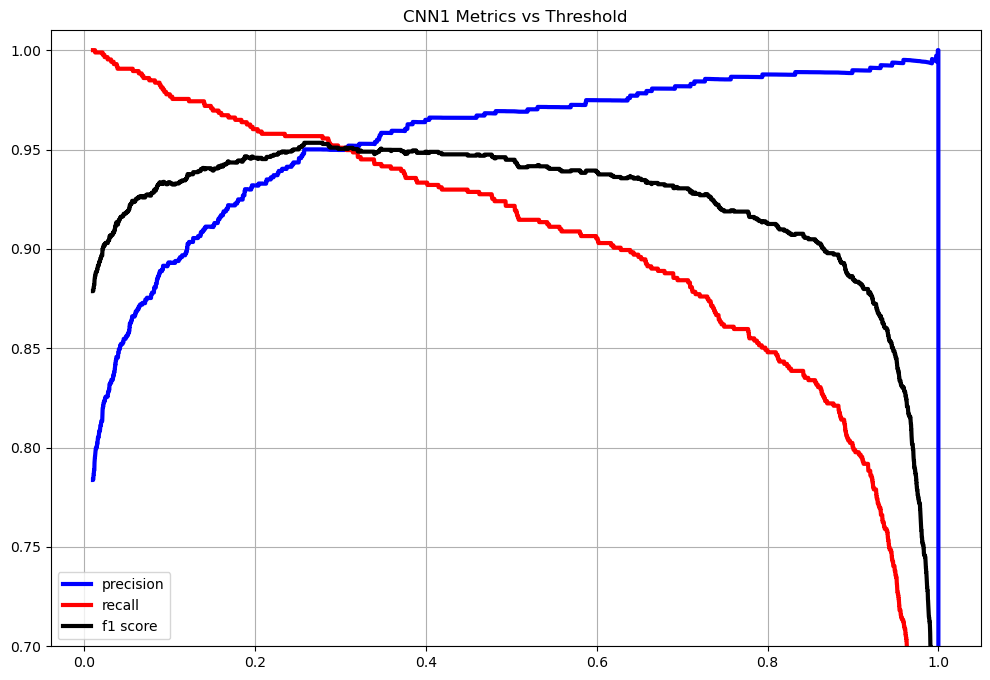

In [30]:
plt.figure(figsize = (12,8))
plt.plot(threshold_arr, metrics_cnn1['precision'], label = 'precision', linewidth = 3, color ='blue', )
plt.plot(threshold_arr, metrics_cnn1['recall'], label = 'recall', linewidth = 3, color = 'red')
plt.plot(threshold_arr, metrics_cnn1['f1'], label = 'f1 score', linewidth = 3, color = 'black')
plt.ylim(0.7,1.01)
plt.grid()
plt.legend()
plt.title('CNN1 Metrics vs Threshold')
plt.show()
plt.close()

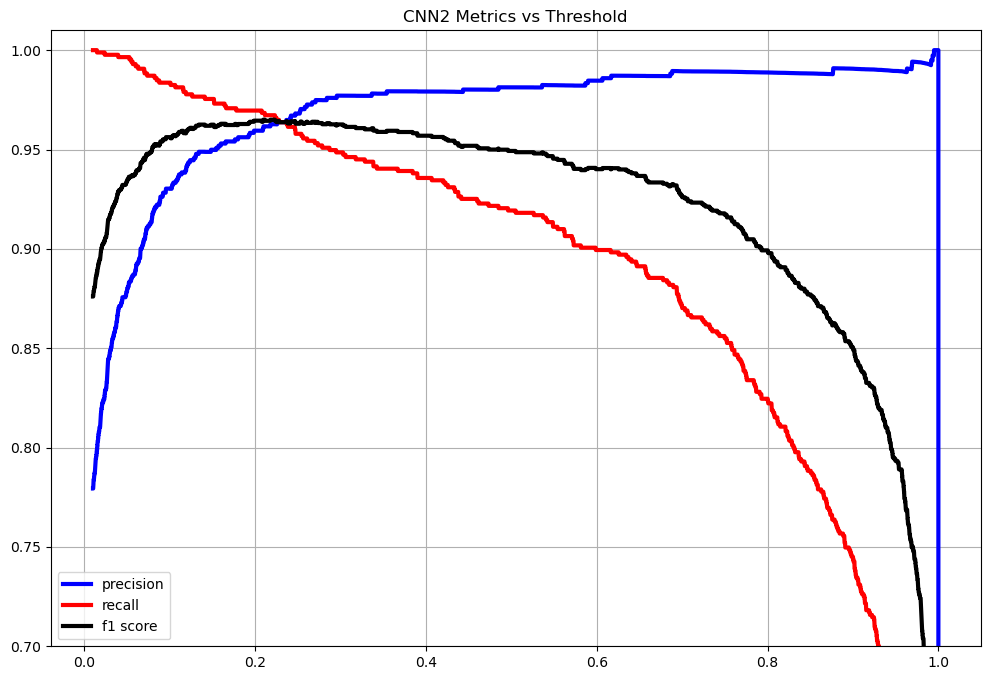

In [31]:
plt.figure(figsize = (12,8))
plt.plot(threshold_arr, metrics_cnn2['precision'], label = 'precision', linewidth = 3, color ='blue', )
plt.plot(threshold_arr, metrics_cnn2['recall'], label = 'recall', linewidth = 3, color = 'red')
plt.plot(threshold_arr, metrics_cnn2['f1'], label = 'f1 score', linewidth = 3, color = 'black')
plt.ylim(0.7,1.01)
plt.grid()
plt.legend()
plt.title('CNN2 Metrics vs Threshold')
plt.show()
plt.close()

#### Plot ROC

 - false positive rate against true positive rate (recall)

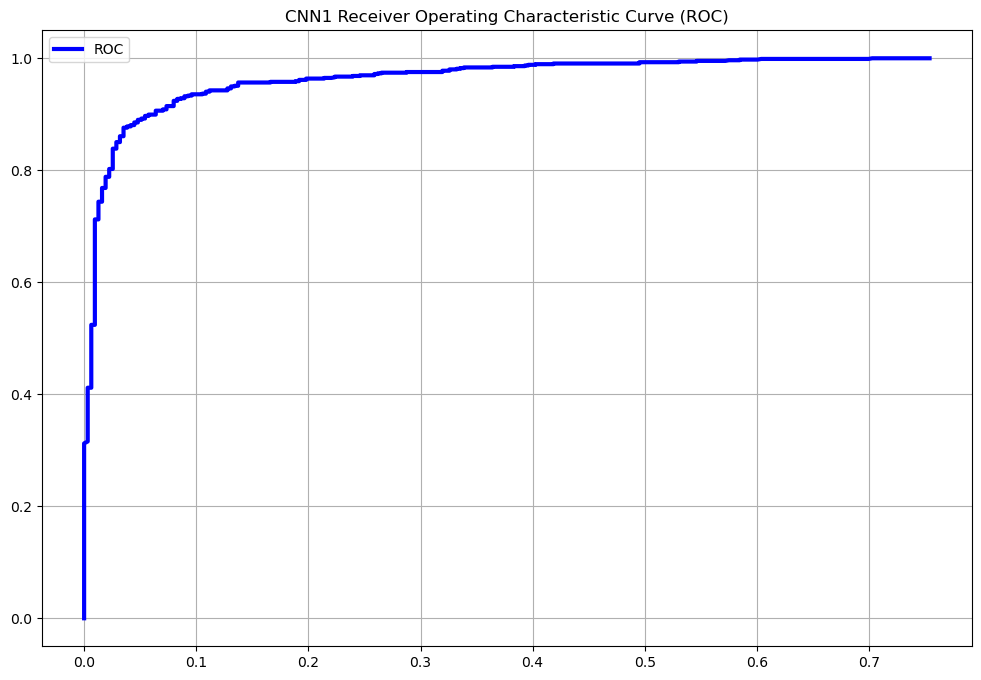

In [32]:
plt.figure(figsize = (12,8))
plt.plot(metrics_cnn1['fpr'], metrics_cnn1['recall'], label = 'ROC', linewidth = 3, color ='blue', )
plt.grid()
plt.legend()
plt.title('CNN1 Receiver Operating Characteristic Curve (ROC)')
plt.show()
plt.close()

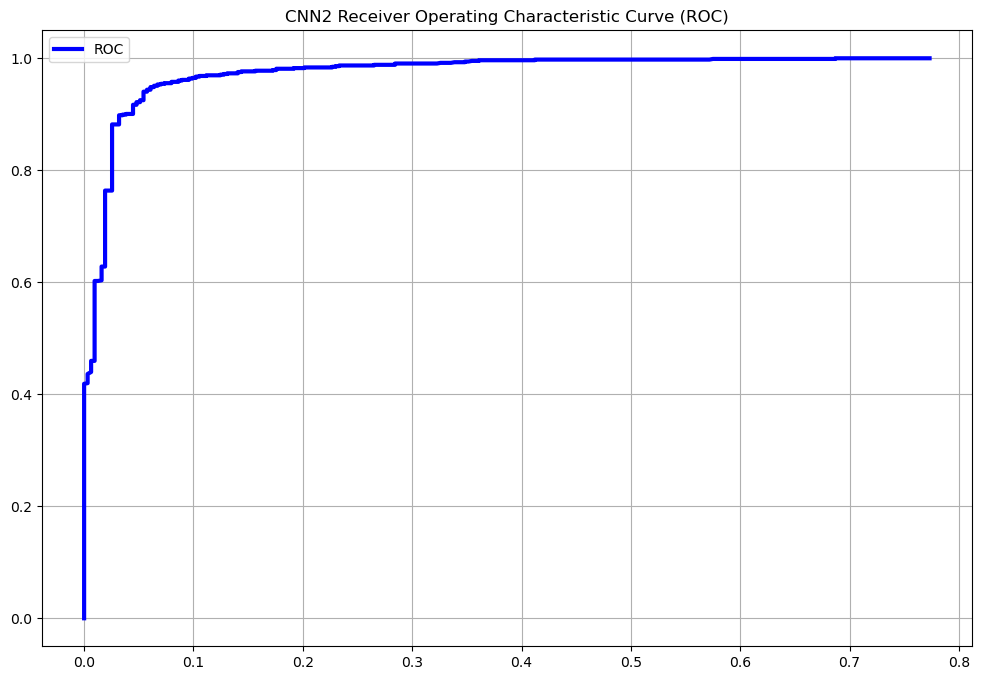

In [33]:
plt.figure(figsize = (12,8))
plt.plot(metrics_cnn2['fpr'], metrics_cnn2['recall'], label = 'ROC', linewidth = 3, color ='blue', )
plt.grid()
plt.legend()
plt.title('CNN2 Rmetrics_cnn2['recall']eceiver Operating Characteristic Curve (ROC)')
plt.show()
plt.close()

#### Calculate area under curve for ROC

In [41]:
roc_auc1 = auc(metrics_cnn1['fpr'], metrics_cnn1['recall'])
roc_auc2 = auc(metrics_cnn2['fpr'], metrics_cnn1['recall'])
print(roc_auc1)
print(roc_auc2)

0.7259776170991908
0.7527941258898043


In [ ]:
plt.figure(figsize = (12,8))
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.ylim(0.7,1)

In [ ]:
plt.semilogy(history1['loss'])
plt.semilogy(history1['val_loss'])

In [ ]:
plt.semilogy(history1['learning_rate'])